        Exercice 3 : PCA pour réduction de dimension


Notons A = (A1,A2), où A1 et A2 sont les colonnes de A. 

On remarque que <A1,A2> (produit scalaire de A1,A2) vaut alpha.
Donc cos(A1,A2) = alpha.

Ainsi : 

Lorsque alpha tend vers 0, les colonnes tendent vers la perpendicularité.

Lorsque alpha tend vers 1, les colonnes tendent vers l'alignement.




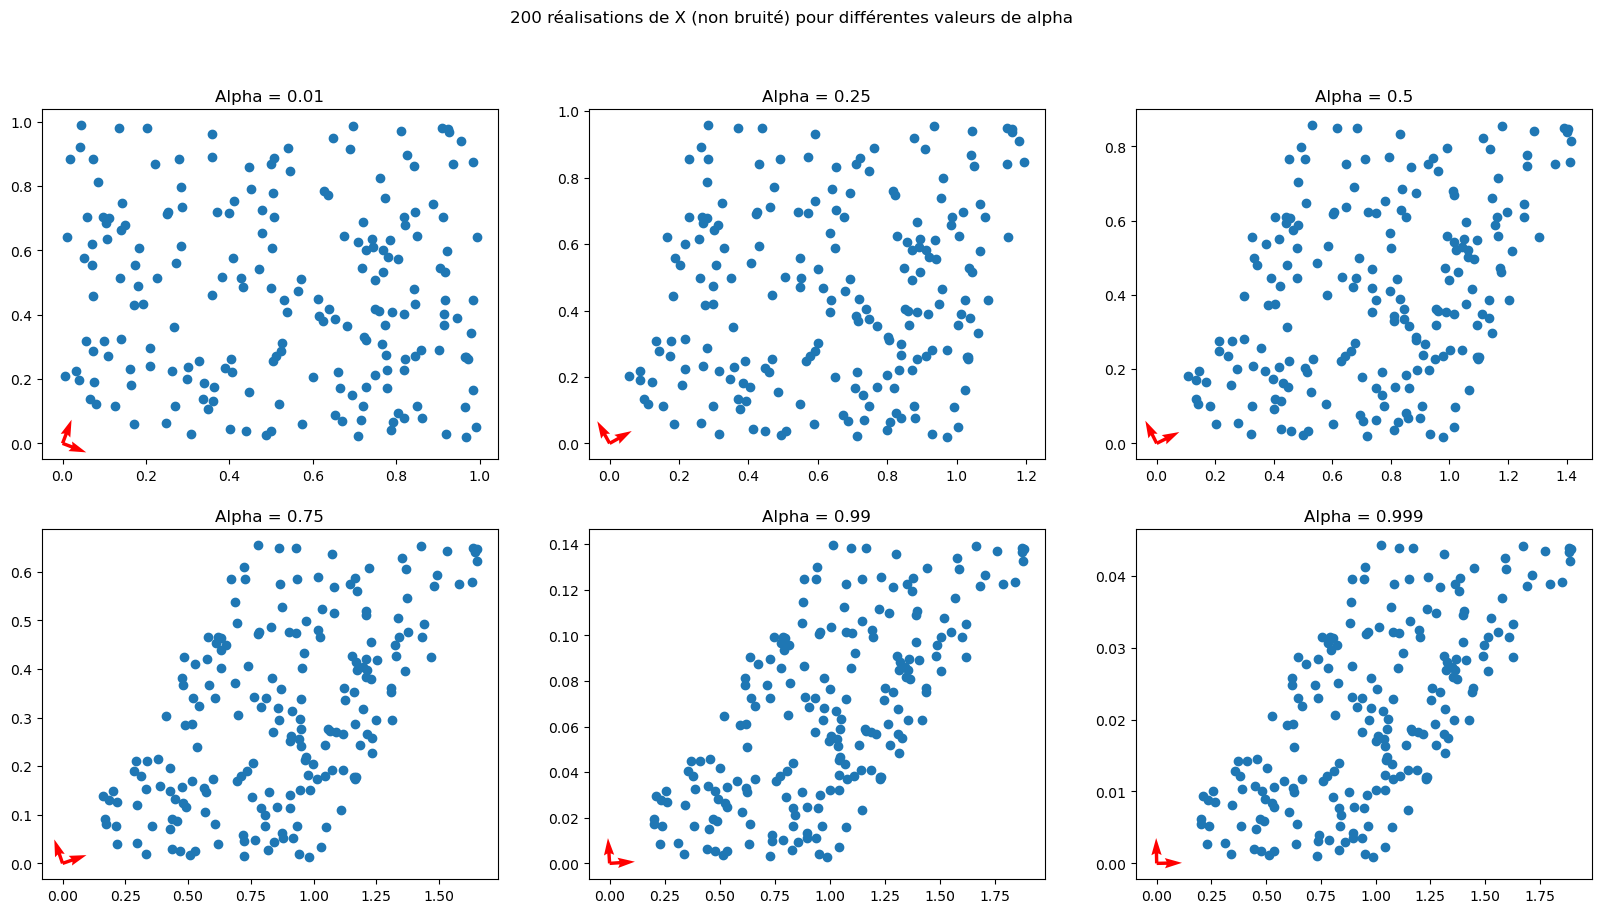

In [11]:
import numpy as np
import random as rd 
from matplotlib import pyplot as plt

# Initialisation des paramètres de X 
sigma2 = 0  # paramètre du bruit
alpha = [0.01, 0.25, 0.5, 0.75, 0.99, 0.999]   # alpha entre -1 et 1

# Initialisation des éléments intervenant dans X
A = np.array([[[1, alpha[i]], [0, np.sqrt(1 - alpha[i]**2)]] for i in range(len(alpha))])

# Génération des réalisations du vecteur X non bruité
n = 200 # Nombre de réalisations de X
X = np.zeros((n, len(alpha), 2))  

for k in range(n):
    Z = np.array([rd.uniform(0, 1), rd.uniform(0, 1)]) 
    B = np.array([rd.uniform(0, 1), rd.uniform(0, 1)]) 
    X[k] = np.array([np.dot(A[i], Z) + sigma2*B for i in range(len(alpha))])
    
# Extraction des vecteurs et valeurs propres de la matrice de covariance
Cov = [np.cov(X[:, i, :].T) for i in range(len(alpha))] #Liste des matrices des covariances pour chaque alpha
Eig_Values, Eig_Vectors  = [np.linalg.eig(Cov[i])[0] for i in range (len(alpha))],np.array([np.linalg.eig(Cov[i])[1] for i in range (len(alpha))])




# Représentations 
fig, axs = plt.subplots(2,3,figsize=(20,10))
fig.suptitle(str(n)+" réalisations de X (non bruité) pour différentes valeurs de alpha")

axs = axs.flatten()  # Transformer axs en une liste linéarisée

for i in range(6):
    axs[i].set_title("Alpha = " + str(alpha[i]))
    axs[i].scatter(X[:, i, 0], X[:, i, 1])
    Eig_Values_i = Eig_Values[i]
    Eig_Vectors_i = Eig_Vectors[i]
    for j in range(2):  # 2 vecteurs propres
        axs[i].quiver(0, 0, Eig_Values_i[j] * Eig_Vectors_i[0, j],Eig_Values_i[j] * Eig_Vectors_i[1, j],color='r')    
plt.show()


On remarque que plus alpha tend vers 1 (plus les colonnes de A sont alignées voire même égales) et plus les composantes de X sont dépendantes


In [19]:
# Evaluation des erreurs d'estimation
U1 = Eig_Vectors[:, :, 0] 



2
